### decision trees and random forests ###
Reading asssingnment .....chapter 8 of isr
#### decision trees ###
Here we use  A DECISION TREE Alongside some factors to determine whether an event will occur or not.

The decision tree is made up of nodes(split for the value of a certain attribute) , edges (outcome of a split to the next node),root(thee node that performs the first split), leaves (terminal node that predicts the outcome).

Entropy and information ginis are the methods of choosing the best split.

To improve on performance, we can use as many trees with a random sample of features chosen as the split.

A new random sample of features is chosen for every single tree at every single split.

For classification m(random sample of m features) is n to be the squareroot of p(full set of features).

After creation of these decision trees, we aggregate the results and make a decision.

The reason for bootstrappiing (reandom samplig of a data set with replacement) is to reduce ythe sensitivity of the data to the original dataset by making sure all data sets are different.

The random feature selection reduces the correlation between the trees.

Since using the original data the feature with the most effect will be the decision node to most , this leads to a high correlation between individual trees.

However some of the trees will be trained on less significant features giving bad predictions in the opposite direction, there will be other features giving bad predictions in the opposite direction hence balancing out.

The number of features to use on each trees by convention the squareroot of the total features.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Desktop/python/kyphosis-221207-092130.csv")

In [4]:
df #age is in months ...kyhosis is just a spinalcord condition and here the patients are being checked whether they still have it after treatment
#number... number of vertebrae affected by kyphosis... #Start the position of the butterfly where the kyphosis started.


Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


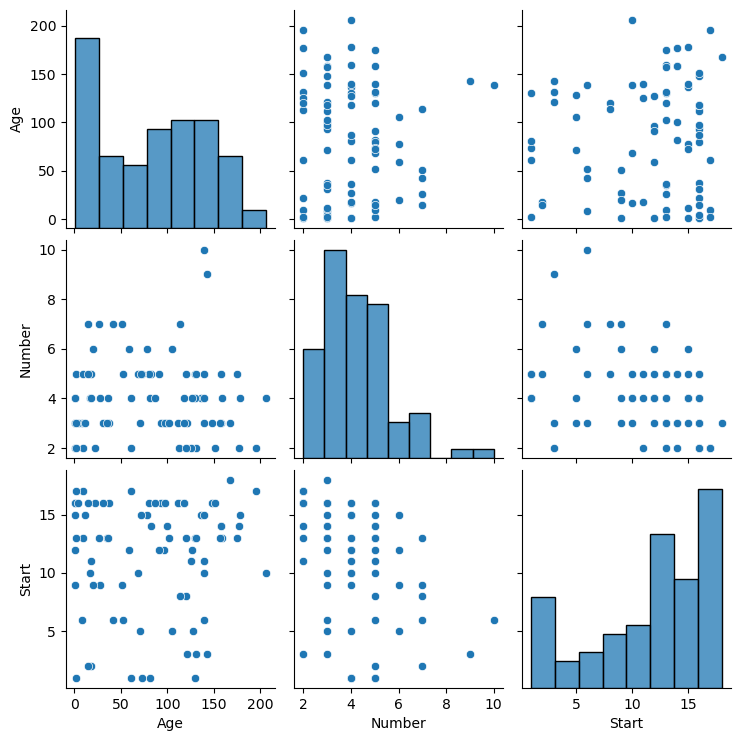

In [7]:
sns.pairplot(data = df)

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


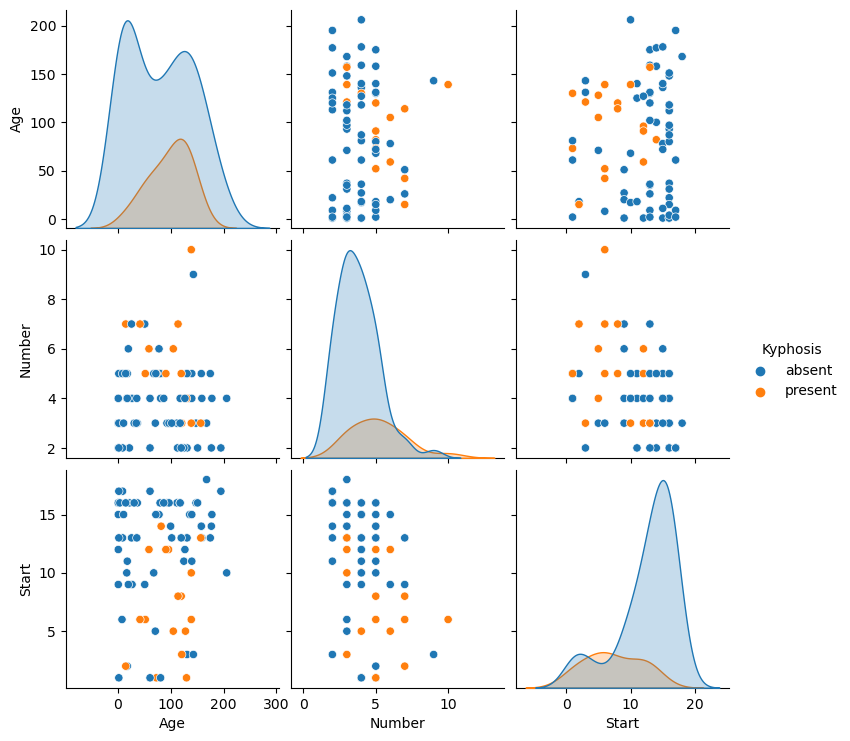

In [8]:
sns.pairplot(data = df, hue="Kyphosis")

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


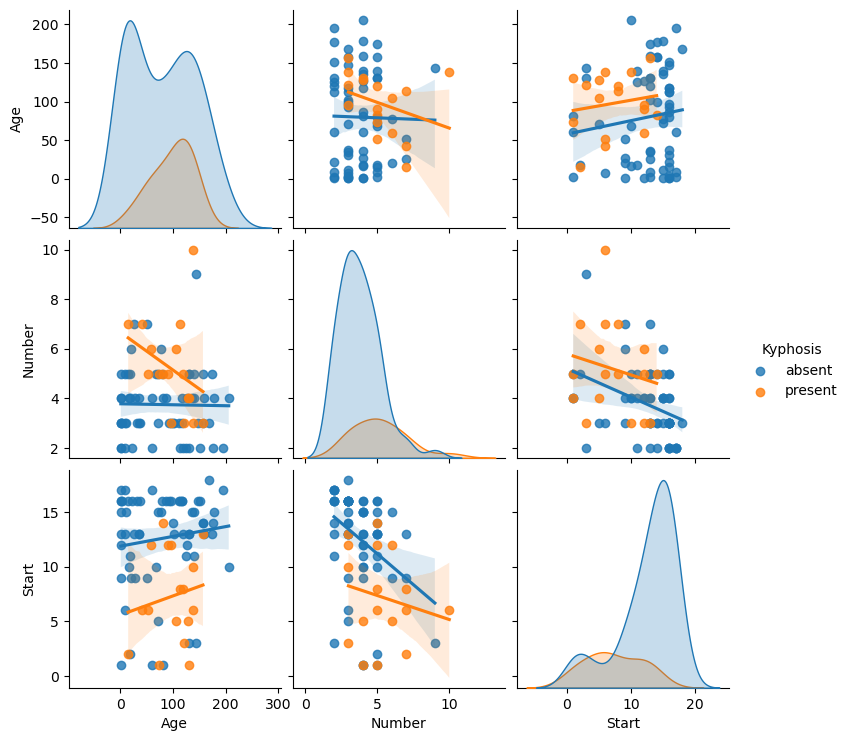

In [11]:
sns.pairplot(data = df, hue="Kyphosis", kind= "reg")

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("Kyphosis", axis = 1)
y= df["Kyphosis"]

In [18]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test, predictions))

[[12  5]
 [ 6  2]]


In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [27]:
#comparing results from decision trees wuith the results from randoom forests(its an ensemble of the decision trees)
from sklearn.ensemble import RandomForestClassifier

In [29]:
#the rfc takes a number of estimators
rfc = RandomForestClassifier(n_estimators = 100)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rfc_predictions = rfc.predict(X_test)

In [35]:
print(confusion_matrix(y_test, rfc_predictions))

[[17  0]
 [ 6  2]]


In [37]:
print (classification_report(y_test, rfc_predictions))#here our model did not do  quite well due to the small size of the data set.

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [38]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [39]:
from sklearn import tree

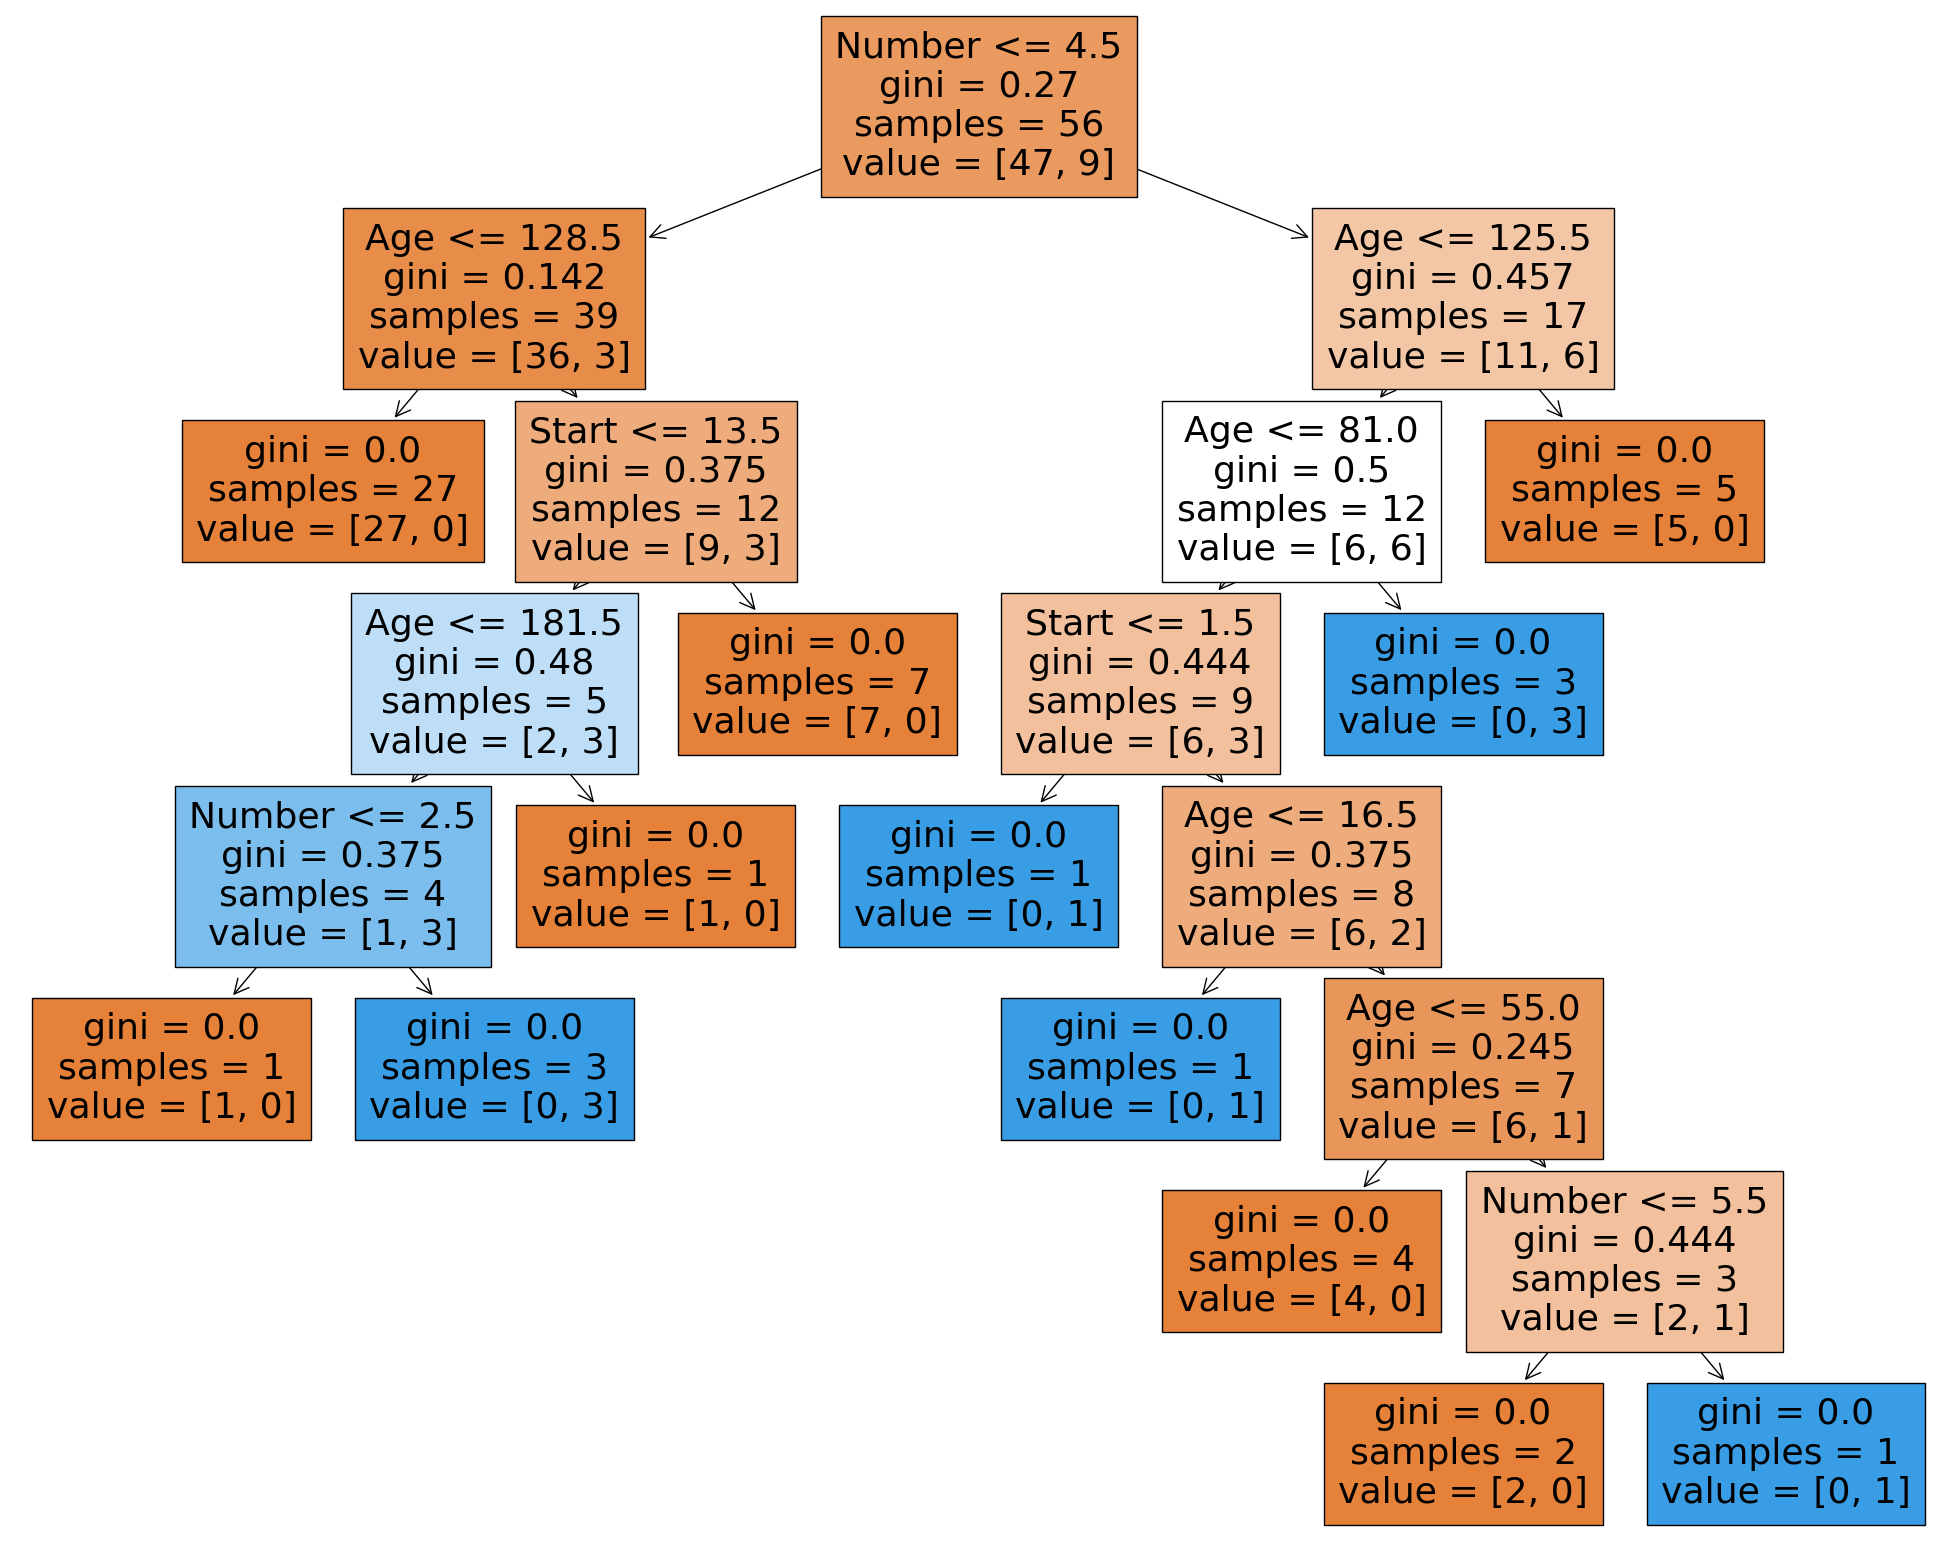

In [42]:
fig = plt.figure(figsize = (25,20))
dt = tree.plot_tree(dtree, feature_names = features, filled = True)
